In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.gridspec as gridspec

In [43]:
mu = -0.01
tau = 0.1
sigma = 5.
mu_p = max(mu,0)

def mvar(n):
  return tau**2 + sigma**2/n

def production_function(n):
  return tau**2/(np.sqrt(2*np.pi*mvar(n))) * np.exp(-mu**2 * mvar(n)/(2* tau**4)) + mu*norm.cdf(mu*np.sqrt(mvar(n))/tau**2) - mu_p

-0.005307870141683763 0.009854099365342575


## Solve for the Metaproduction Function

In [46]:
N = 200_000_000
I = 200
N_step = 10_000
#opt_vals, allocation, opt_alloc = metaproduction_DP_small_I(N,I, N_step)

In [38]:
#np.save(f"../data/{program}_metaproduction_values_N{N}_step{N_step}_small_I{I}",opt_vals)
#np.save(f"../data/{program}_metaproduction_allocation_N{N}_step{N_step}_small_I{I}",allocation)

In [48]:
opt_vals_filename = f"../data/{program}_metaproduction_values_N{N}_step{N_step}_small_I{I}.npy"
allocation_filename = f"../data/{program}_metaproduction_allocation_N{N}_step{N_step}_small_I{I}.npy"

opt_vals = np.load(opt_vals_filename)
allocation = np.load(allocation_filename)

## Solve for the Optimal Sequential Allocation

In [51]:
idea_production = opt_vals[:,np.searchsorted(N_range, 40_000_000)]

In [53]:
T = 12
I = 101


sequential_opt_vals = np.zeros((I,T))
sequential_opt_indexes = np.zeros((I,T))

# F(I,N)

# base case I = 1
# solution is just F(1,N). Can test the idea whenever

sequential_opt_vals[0,:] = idea_production[1]
sequential_opt_indexes[0,:] = np.zeros(T)
sequential_opt_indexes[0,0] = 1

# base case T = 1
# solution is just F(I, N)
for i in range(I):
    sequential_opt_vals[i,0] = idea_production[i]
    sequential_opt_indexes[i,0] = i


for i in range(1,I):
    for t in range(1,T):
        v = sequential_opt_vals[i - np.arange(i+1), t - 1] + idea_production[np.arange(i+1)]*(T - t)

        idx = np.argmax(v)
        sequential_opt_vals[i,t] = v[idx]
        sequential_opt_indexes[i,t] = idx 

In [54]:
allocation = sequential_opt_indexes.T

opt_alloc = np.zeros(allocation.shape[0]).astype(int)
running_I = I # This is not necessarily right.

for t in range(allocation.shape[0])[::-1]:
    
    opt_alloc[t] = allocation[t, running_I-1]
    running_I = running_I - int(opt_alloc[t])


opt_alloc = opt_alloc.tolist()
print(list(opt_alloc[1:]) +  list(opt_alloc[:1]))

[21, 19, 17, 14, 12, 9, 6, 2, 0, 0, 0, 0]


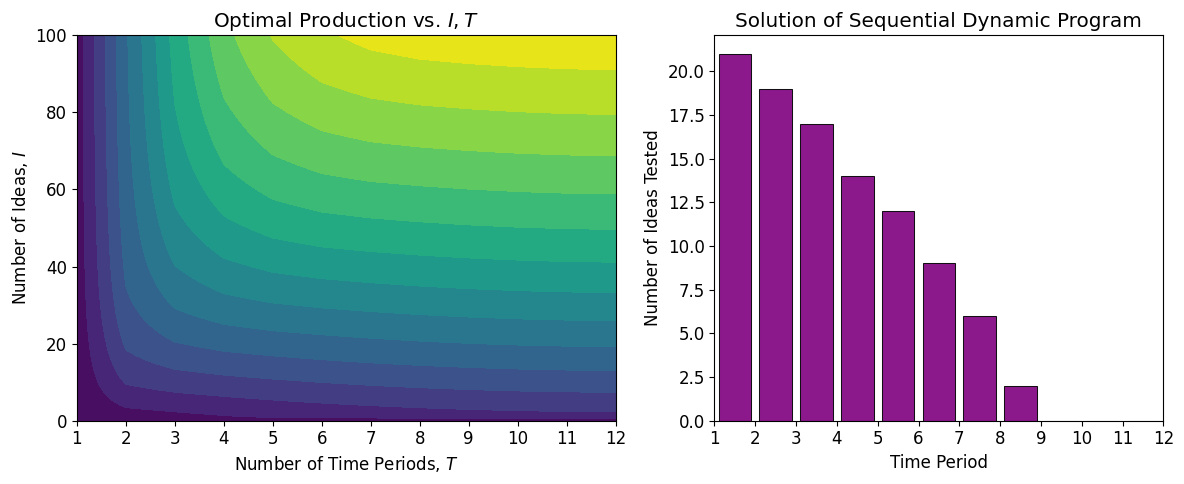

In [67]:
# Create a figure with a gridspec layout
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1.2, 1])  # 1 row, 2 columns


plt.rcParams['font.size'] = 12

# Create the contour plot in the left subplot
ax1 = fig.add_subplot(gs[0])
contour = ax1.contourf(sequential_opt_vals, levels=15, cmap = "magma")

# Customize the xticks to start from 1 instead of 0
num_ticks = sequential_opt_vals.shape[1]  # Get the number of x-ticks based on data
ax1.set_xticks(np.arange(num_ticks))
ax1.set_xticklabels(np.arange(1, num_ticks + 1))  # Set x-tick labels

# Set y-axis label for contour plot
ax1.set_xlabel("Number of Time Periods, $T$ ")
ax1.set_ylabel("Number of Ideas, $I$")
ax1.set_xlim(0, num_ticks - 1)

# Set plot title
ax1.set_title("Optimal Production vs. $I,T$")

# Create the bar plot in the right subplot
ax2 = fig.add_subplot(gs[1], sharex=ax1)
bar_width = 0.8
bar_positions = np.arange(num_ticks) - 0.5
bars = ax2.bar(bar_positions, opt_alloc, width=bar_width, alpha=0.9, color='purple',
               edgecolor='black', linewidth=0.75)

# Set x-axis label for the bar plot
ax2.set_xlabel("Time Period")
ax2.set_xticks(np.arange(num_ticks))
ax2.set_xticklabels(np.arange(1, num_ticks + 1))

# Set y-axis label for the bar plot
ax2.set_ylabel("Number of Ideas Tested")
ax2.set_title("Solution of Sequential Dynamic Program")

# Adjust layout to make room for labels
plt.tight_layout()

# Show the plot
plt.show()